<a href="https://colab.research.google.com/github/belogabriel/pandas_lib/blob/main/analise_imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dataset = pd.read_excel('houses_rent.xlsx')
dataset.head(10)

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200,42,28,2270
6,6,Barcelona,55,1,1,1,2,accept,furnished,1950,5000,375,64,7389
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300,67,17,1984
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000,109,26,2963
9,9,Barcelona,32,1,1,1,16,accept,not furnished,533,2900,0,37,3470


In [ ]:
dataset.tail()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150,0,15,1585
6076,6076,Barcelona,84,2,2,1,16,not accept,furnished,768,2900,63,37,3768
6077,6077,Porto,48,1,1,0,13,accept,not furnished,250,950,42,13,1255
6078,6078,Barcelona,160,3,2,2,-,not accept,not furnished,0,3500,250,53,3803
6079,6079,Barcelona,60,2,1,1,4,accept,furnished,489,1900,0,25,2414


In [ ]:
dataset = dataset.rename(columns={'parking spaces' : 'parking_spaces', 'rent amount' : 'rent_amount', 'property tax' : 'property_tax', 'fire insurance' : 'fire_insurance'})

In [ ]:
dataset.dtypes

index              int64
city              object
area               int64
rooms              int64
bathroom           int64
parking_spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent_amount        int64
property_tax       int64
fire_insurance     int64
total              int64
dtype: object

In [ ]:
dataset = dataset.astype({"rent_amount":"float", "property_tax":"float", "fire_insurance":"float", "total":"float"})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   int64  
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_spaces  6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 665.1+ KB


In [ ]:
dataset[["area", "rooms", "bathroom", "parking_spaces", "rent_amount", "property_tax", "fire_insurance", "total"]].describe()

,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,151.143914,2.492599,2.341612,1.756250,4395.844408,490.533224,58.204276,6033.194572
std,375.559485,1.129665,1.438860,1.611909,3576.668946,6212.549484,49.313441,8751.347700
min,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,1800.000000,34.000000,23.000000,2451.500000
50%,100.000000,3.000000,2.000000,1.000000,3111.000000,145.000000,41.000000,4128.500000
75%,200.000000,3.000000,3.000000,2.000000,5952.500000,458.000000,77.000000,8074.000000
max,24606.000000,10.000000,10.000000,12.000000,45000.000000,366300.000000,677.000000,372700.000000


In [ ]:
dataset[(dataset["total"]<=4000) & (dataset["animal"] == "accept")] #filtrando imóvis c; valores totais até 4000 euros e petfriendly.

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6059,6059,Barcelona,59,2,1,1,10,accept,not furnished,589,1500.0,0.0,20.0,2109.0
6065,6065,Barcelona,133,2,2,1,7,accept,not furnished,813,2713.0,160.0,35.0,3721.0
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150.0,0.0,15.0,1585.0
6077,6077,Porto,48,1,1,0,13,accept,not furnished,250,950.0,42.0,13.0,1255.0


In [ ]:
#utlizando o query para realizar a mesma função.
dataset.query("total <= 4000 and animal == 'accept'")

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6059,6059,Barcelona,59,2,1,1,10,accept,not furnished,589,1500.0,0.0,20.0,2109.0
6065,6065,Barcelona,133,2,2,1,7,accept,not furnished,813,2713.0,160.0,35.0,3721.0
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150.0,0.0,15.0,1585.0
6077,6077,Porto,48,1,1,0,13,accept,not furnished,250,950.0,42.0,13.0,1255.0


In [ ]:
filterds = dataset[(dataset["total"]<=4000) & (dataset["animal"] == "accept") & ((dataset['rooms'] == 2)|(dataset['rooms']==3))] #adicionando filtro para 2 ou 3 quartos.
filterds.head(10)

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010.0,584.0,46.0,3640.0
17,17,Barcelona,100,3,2,1,-,accept,not furnished,0,3500.0,260.0,53.0,3813.0
20,20,Barcelona,155,3,3,2,-,accept,not furnished,0,2650.0,233.0,40.0,2923.0
28,28,Porto,150,3,2,2,13,accept,not furnished,1370,1800.0,250.0,23.0,3443.0
30,30,Barcelona,70,2,1,0,1,accept,not furnished,521,3000.0,50.0,39.0,3610.0


In [ ]:
dataset.query(("total <= 4000 and animal == 'accept'") and ("rooms == 2 or rooms == 3"))

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000.0,1000.0,121.0,9121.0
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,6073,Barcelona,88,2,2,1,1,accept,not furnished,1200,6000.0,0.0,77.0,7277.0
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150.0,0.0,15.0,1585.0
6076,6076,Barcelona,84,2,2,1,16,not accept,furnished,768,2900.0,63.0,37.0,3768.0
6078,6078,Barcelona,160,3,2,2,-,not accept,not furnished,0,3500.0,250.0,53.0,3803.0


In [ ]:
group_city_price = pd.DataFrame(dataset.groupby(["city"])["total"].agg("mean")).reset_index()
group_city_price # média de preço dos imoveis nas cidades apresentadas no dataset.

,city,total
0,Barcelona,6457.271099
1,Porto,3354.521059


In [ ]:
group_bath_room = pd.DataFrame(dataset.groupby(["bathroom", "rooms"])["total"].agg("mean")).reset_index()
group_bath_room

,bathroom,rooms,total
0,1,1,2738.951181
1,1,2,2499.943489
2,1,3,3220.513812
3,1,4,5725.571429
4,2,1,7901.605042
5,2,2,4310.918530
6,2,3,5077.840999
7,2,4,7042.283784
8,2,5,5939.428571
9,2,6,3614.500000


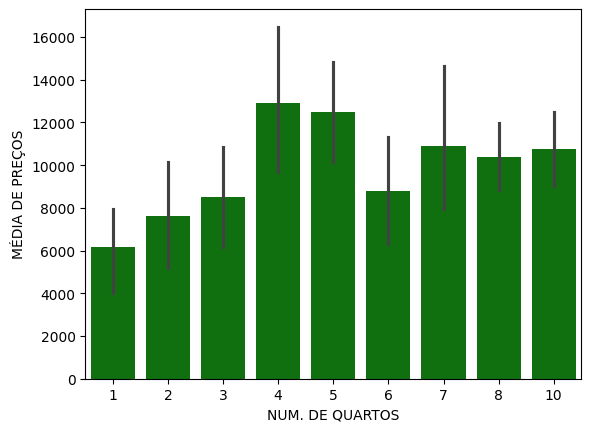

In [ ]:
ax = sns.barplot(data=group_bath_room, x='rooms', y='total', color = 'green');
ax.set(xlabel='NUM. DE QUARTOS', ylabel='MÉDIA DE PREÇOS'); #COMO A QTD DE QUARTOS ALTERA A MÉDIA DE PREÇO DOS IMÓVEIS.

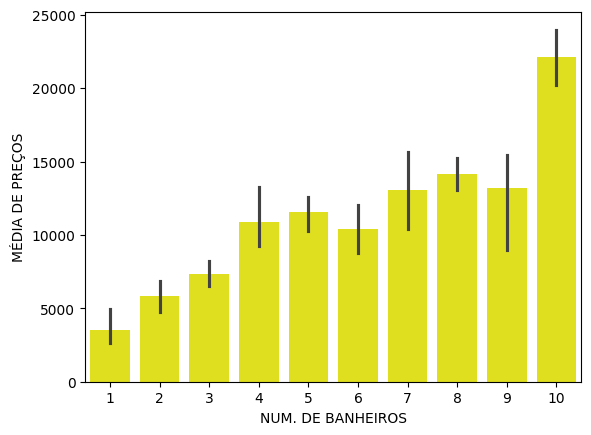

In [ ]:
ax = sns.barplot(data=group_bath_room, x='bathroom', y='total', color = 'yellow');
ax.set(xlabel='NUM. DE BANHEIROS', ylabel='MÉDIA DE PREÇOS'); #COMO A QTD DE BANHEIROS ALTERA A MÉDIA DE PREÇO DOS IMÓVEIS.

In [ ]:
group_area = dataset[['area']]

In [ ]:
group_area = group_area.query("area <= 100") #deixando os valores mais próximos std<mean

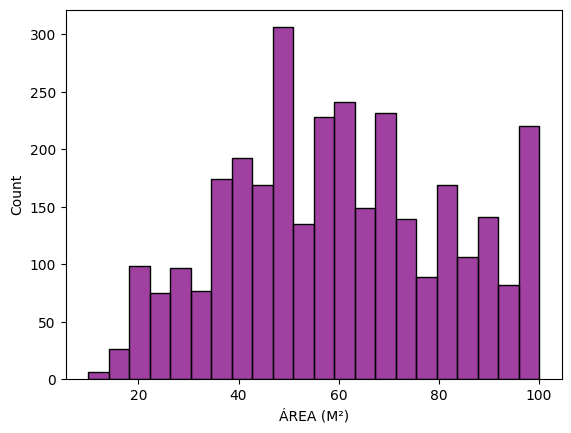

In [ ]:
areagraph = sns.histplot(data=group_area, x="area", color='purple');
areagraph.set(xlabel= 'ÁREA (M²)'); #QUANTIDADE DE IMOVEIS POR ÁREA (LIMITADOS A 100M²)

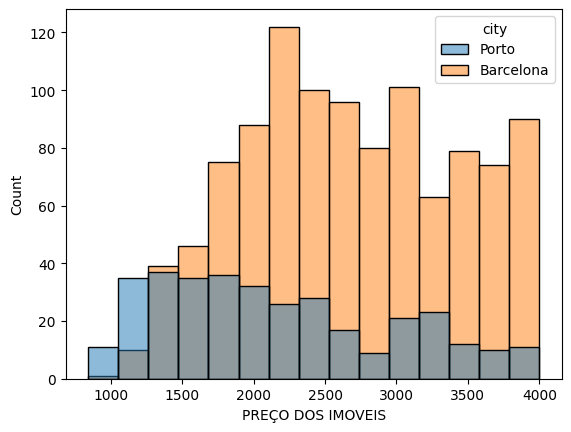

In [ ]:
 citygraf = sns.histplot(data=filterds, x='total', hue='city');
 citygraf.set(xlabel='PREÇO DOS IMOVEIS'); #COM ESSE GRÁFICO É POSSIVEL PERCEBER QUE OS IMOVÉIS MAIS BARATOS ESTÃO CONCENTRADOS EM PORTO E QUE EM BARCELONA TEMOS MAIS OPÇOES CONFORME O CUSTO AUMENTA.

In [ ]:
filterds = filterds.query("city == 'Porto'")
filterds.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010.0,584.0,46.0,3640.0
28,28,Porto,150,3,2,2,13,accept,not furnished,1370,1800.0,250.0,23.0,3443.0
36,36,Porto,94,3,3,2,1,accept,not furnished,750,2200.0,192.0,28.0,3170.0


In [ ]:
uniquefloor = pd.DataFrame(filterds.groupby('floor').index.nunique().sort_values())

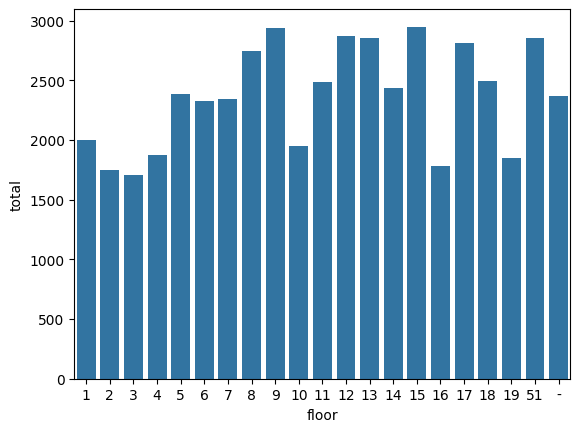

In [ ]:
group_floor_price = pd.DataFrame(filterds.groupby('floor')['total'].agg("mean"))
sns.barplot(data=group_floor_price, x='floor',y='total');


In [ ]:
sixteenthfloors = filterds.query("floor == 16")
sixteenthfloors

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900.0,61.0,12.0,1523.0
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200.0,89.0,16.0,2035.0
